# Fire Department Calls Service Analytics

## ***Transforming Data Into Insights***

In [1]:
## Load All the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

### Read the original data

In [2]:
### Read all data

df=pd.read_csv('../data/Fire_Department_Calls_for_Service.csv', nrows=5)

### Show top 5 rows
df.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,RowID,case_location,Analysis Neighborhoods
0,211220229,54,21052265,Medical Incident,05/02/2021,05/01/2021,05/02/2021 02:52:22 AM,05/02/2021 02:54:09 AM,05/02/2021 02:54:17 AM,05/02/2021 02:54:22 AM,05/02/2021 03:03:37 AM,05/02/2021 03:25:27 AM,05/02/2021 03:50:51 AM,Code 2 Transport,05/02/2021 04:22:26 AM,600 Block of HURON AVE,San Francisco,94112,B09,33,8347,3,2,2,True,Non Life-threatening,1,MEDIC,2,9,11,Outer Mission,211220229-54,POINT (-122.44916885747516 37.71245377965039),28
1,213150159,T13,21138532,Alarms,11/11/2021,11/10/2021,11/11/2021 01:45:25 AM,11/11/2021 01:46:46 AM,11/11/2021 01:47:12 AM,11/11/2021 01:49:56 AM,11/11/2021 01:54:21 AM,NaN,NaN,Fire,11/11/2021 02:21:37 AM,200 Block of SUTTER ST,San Francisco,94108,B01,13,1242,3,3,3,False,Alarm,1,TRUCK,1,1,3,Financial District/South Beach,213150159-T13,POINT (-122.40481437114843 37.789761426544466),8
2,210690030,T03,21030278,Alarms,03/10/2021,03/09/2021,03/10/2021 12:16:03 AM,03/10/2021 12:18:36 AM,03/10/2021 12:19:01 AM,03/10/2021 12:20:15 AM,NaN,NaN,NaN,Fire,03/10/2021 12:28:42 AM,1300 Block of MARKET ST,San Francisco,94102,B02,36,3111,3,3,3,False,Alarm,1,TRUCK,3,2,6,Tenderloin,210690030-T03,POINT (-122.41697932641094 37.7770834641944),36
3,210391607,E19,21017645,Alarms,02/08/2021,02/08/2021,02/08/2021 01:00:14 PM,02/08/2021 01:01:36 PM,02/08/2021 01:01:40 PM,02/08/2021 01:03:21 PM,02/08/2021 01:05:44 PM,NaN,NaN,Fire,02/08/2021 01:18:09 PM,400 Block of SERRANO DR,San Francisco,94132,B08,19,8581,3,3,3,True,Alarm,1,ENGINE,1,8,7,Lakeshore,210391607-E19,POINT (-122.48045074945836 37.7190118676788),16
4,212173268,B06,21093161,Alarms,08/05/2021,08/05/2021,08/05/2021 09:36:42 PM,08/05/2021 09:38:01 PM,08/05/2021 09:38:39 PM,08/05/2021 09:40:09 PM,08/05/2021 09:42:57 PM,NaN,NaN,Fire,08/05/2021 09:56:33 PM,1100 Block of VALENCIA ST,San Francisco,94110,B06,11,5512,3,3,3,False,Alarm,1,CHIEF,1,6,8,Mission,212173268-B06,POINT (-122.4209570965718 37.75449478673656),20


### Reading the dataset with the required columns needed for analysis

In [3]:
### Reading the dataset
print("Data Reading started: ", datetime.now())

## Get list of required features
use_cols = ["Call Type", "Call Date", 'Received DtTm','Dispatch DtTm','Response DtTm',"Zipcode of Incident","Station Area", "Battalion","Call Type Group","Call Final Disposition"]

# Parse the below features as Date feature 
col_dates = ['Call Date', 'Received DtTm','Dispatch DtTm', 'Response DtTm']

## Read the csv for required features into DataFrames.
df=pd.read_csv('../data/Fire_Department_Calls_for_Service.csv', parse_dates=col_dates, usecols=use_cols)

print("Data Reading Finished: ", datetime.now())

Data Reading started:  2022-02-08 16:05:49.223977
Data Reading Finished:  2022-02-08 16:50:41.373053


In [4]:
### Show top 5 rows.
df.head(5)

,Call Type,Call Date,Received DtTm,Dispatch DtTm,Response DtTm,Call Final Disposition,Zipcode of Incident,Battalion,Station Area,Call Type Group
0,Medical Incident,2021-05-02,2021-05-02 02:52:22,2021-05-02 02:54:17,2021-05-02 02:54:22,Code 2 Transport,94112.0,B09,33.0,Non Life-threatening
1,Alarms,2021-11-11,2021-11-11 01:45:25,2021-11-11 01:47:12,2021-11-11 01:49:56,Fire,94108.0,B01,13.0,Alarm
2,Alarms,2021-03-10,2021-03-10 00:16:03,2021-03-10 00:19:01,2021-03-10 00:20:15,Fire,94102.0,B02,36.0,Alarm
3,Alarms,2021-02-08,2021-02-08 13:00:14,2021-02-08 13:01:40,2021-02-08 13:03:21,Fire,94132.0,B08,19.0,Alarm
4,Alarms,2021-08-05,2021-08-05 21:36:42,2021-08-05 21:38:39,2021-08-05 21:40:09,Fire,94110.0,B06,11.0,Alarm


## Data Preprocessing 

In [5]:
## Get the dataframe's information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782134 entries, 0 to 5782133
Data columns (total 10 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Call Type               object        
 1   Call Date               datetime64[ns]
 2   Received DtTm           datetime64[ns]
 3   Dispatch DtTm           datetime64[ns]
 4   Response DtTm           datetime64[ns]
 5   Call Final Disposition  object        
 6   Zipcode of Incident     float64       
 7   Battalion               object        
 8   Station Area            object        
 9   Call Type Group         object        
dtypes: datetime64[ns](4), float64(1), object(5)
memory usage: 441.1+ MB


### Calculate the Response Delay in mins

In [6]:
## Calculate the response delay in mins
df['Response_Delayed'] = np.where(df["Response DtTm"].isnull(), df["Dispatch DtTm"] - df["Received DtTm"], df["Response DtTm"] - df["Received DtTm"])
df['Response_Delayed'] = df['Response_Delayed'].dt.total_seconds()/60

### Binning the response time in buckets

In [24]:
## Bining the response time in buckets

def binning_response_time(x):    
    if x >= 0 and x < 2: 
        return '0-2 mins'
    elif x >= 2 and x < 4: 
        return '2-4 mins'
    elif x >= 4 and x < 6: 
        return '4-6 mins'
    elif x >= 6 and x < 8: 
        return '6-8 mins'
    elif x >= 8 and x < 10: 
        return '8-10 mins'
    elif x >= 10 and x < 15: 
        return '10-15 mins'
    elif x >= 15 and x < 30: 
        return '15-30 mins'
    elif x>=30: 
        return '>30 mins'
    
df['binning_response_time'] = df['Response_Delayed'].apply(binning_response_time)

### Identify and Handling Missing Data

In [25]:
df.isnull().sum()

Call Type                      0
Call Date                      0
Received DtTm                  0
Dispatch DtTm                  0
Response DtTm             427264
Call Final Disposition         0
Zipcode of Incident        14646
Battalion                      0
Station Area                2395
Call Type Group                0
Response_Delayed               0
binning_response_time        311
dtype: int64

In [9]:
## Handling "Call Type Group" Feature
df['Call Type Group'].fillna('Unknown', inplace=True)

## Data Visualization

### Fire Calls by Response Time (In mins)

In [27]:
tg_ch  =  df["binning_response_time"].value_counts().reset_index()
tg_ch.columns  = ["binning_response_time","count"]

trace1 = go.Bar(x = tg_ch["binning_response_time"]  , y = tg_ch["count"],
                name = "Calls by Response Time (In mins)",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Calls by Response Time (In mins)", title_x=0.5,
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Response Time (In mins)",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Call Counts",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )

data = [trace1]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

### Observations:

Around 73% calls were responded within 4 mins. 

*(49% calls & 24% calls were responded within 2-4 mins & 0-2 mins respectively)*

### Fire Calls received by Call types

In [11]:
tg_ch  =  df["Call Type"].value_counts().reset_index()
tg_ch.columns  = ["call_type","count"]

trace1 = go.Bar(x = tg_ch["call_type"]  , y = tg_ch["count"],
                name = "Incidents by Call Type",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Fire Calls received by Call types", title_x=0.5,
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Call Type",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Incident Counts",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )

data = [trace1]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [12]:
## Different types of Calls made to dept.
df_calls_by_type=pd.DataFrame((df["Call Type"].value_counts(), df["Call Type"].value_counts()/df["Call Type"].value_counts().sum()*100)).T
df_calls_by_type.columns=['Calls', 'Calls (%)']
df_calls_by_type

,Calls,Calls (%)
Medical Incident,3789539.0,65.538761
Structure Fire,698516.0,12.080592
Alarms,635060.0,10.983142
Traffic Collision,236187.0,4.084772
Other,93713.0,1.620734
Citizen Assist / Service Call,86259.0,1.491819
Outside Fire,72941.0,1.261489
Water Rescue,30277.0,0.523630
Vehicle Fire,26508.0,0.458447
Gas Leak (Natural and LP Gases),25032.0,0.432920


### Observation:

Around 65%, 12% and 11% calls were from Medical Incident, Structure Fire, Alarms respectively.

### Fire Calls received by Call types Group

In [13]:
tg_ch  =  df["Call Type Group"].value_counts().reset_index()
tg_ch.columns  = ["call_type_group","count"]

trace1 = go.Bar(x = tg_ch["call_type_group"]  , y = tg_ch["count"],
                name = "Incidents by Call Type Group",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Fire Calls received by Call types Group", title_x=0.5,
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Call Type Group",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Call Counts",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )

data = [trace1]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

### Observation:

Seen relatively high volumn calls were from Potentially Life Threatening Group 

### Fire Calls received by Call Final Disposition

In [14]:
tg_ch  =  df["Call Final Disposition"].value_counts().reset_index()
tg_ch.columns  = ["Call_Final_Disposition","count"]

trace1 = go.Bar(x = tg_ch["Call_Final_Disposition"]  , y = tg_ch["count"],
                name = "Incidents by Call Final Disposition",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Fire Calls received by Call Final Disposition", title_x=0.5,
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Call Final Disposition",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Call Counts",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )

data = [trace1]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

### Observation:

Significant volumn of calls were from Code 2 Transport and Fire group.

### Summary of Call Type vs Response time

In [15]:
### Summary of Call Type vs Response time
df_calls_summary = pd.crosstab(df['Call Type'], df['binning_response_time'])
df_calls_summary.sort_values(by='0-2 mins', ascending=False)

binning_response_time,0-2 mins,10-15 mins,15-30 mins,2-4 mins,4-6 mins,6-8 mins,8-10 mins,>30 mins
Call Type,,,,,,,,
Medical Incident,882158,57576,46010,1817786,719935,183558,63577,18732
Structure Fire,273236,10348,6974,306937,67615,19750,9849,3755
Traffic Collision,82537,4904,3488,94173,33933,11426,4778,941
Alarms,79940,2413,1251,405313,126050,16078,3549,438
Other,34476,2619,2432,32068,12966,5067,2345,1722
Outside Fire,16059,1279,1075,36357,13652,2967,1095,449
Citizen Assist / Service Call,10378,3506,3116,35801,23505,6573,2497,870
Vehicle Fire,4993,416,445,13956,5134,1088,353,119
Water Rescue,2695,1578,601,10130,9014,4284,1726,249


### Observation:

Almost 60% of the calls were responded within 6 mins for Medical Incident Call type.

### Average Response Time by Call Type

Text(0.5, 0, 'Response Time (In Mins)')

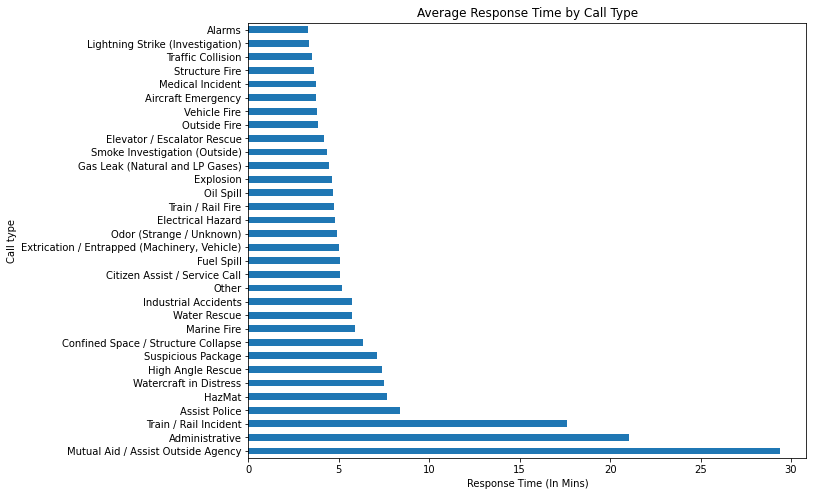

In [16]:
plt.figure(figsize=(10,8))
fig = df.groupby(['Call Type'])['Response_Delayed'].mean().sort_values(ascending=False).plot(kind='barh')
fig.set_title('Average Response Time by Call Type')
fig.set_ylabel('Call type')
fig.set_xlabel('Response Time (In Mins)')

### Observation:

The Alarms, Lightening Strikes Calls have avg. response time within 5 mins, but seen more than 5 mins avg. response time for Train Incident, Admin, Mutual Aid / Asst Outside Agency categories.

### Fire Calls received by year

In [17]:
### Monthly, yearly trend by incidents

tg_ch  = pd.DatetimeIndex(df['Call Date']).year.value_counts().reset_index().sort_values(by='index', ascending=False)
tg_ch.columns  = ["Incident_Year","count"]

trace1 = go.Bar(x = tg_ch["Incident_Year"]  , y = tg_ch["count"],
                name = "Incidents by Year",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Fire Calls received by year", title_x=0.5,
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Year",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Incident Counts",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )

data = [trace1]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

### Observation:

Seen more fire incident calls after 2015 onwards (last 6 years)

### Fire Calls received by Month

In [18]:
tg_ch  = pd.DatetimeIndex(df['Call Date']).month.value_counts().reset_index()
tg_ch.columns  = ["Incident_Month","count"]

trace1 = go.Bar(x = tg_ch["Incident_Month"]  , y = tg_ch["count"],
                name = "Incidents by Month",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Fire Incidents received by month",title_x=0.5,
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Month",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Incident Counts",
                                     zerolinewidth=1,ticklen=5,gridwidth=1),
                       )
                  )

data = [trace1]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

### Observation:

Seen relatively high volumns of calls during December and January month.

## Fire Calls received by Day of week

In [19]:
dayOfweek_map = {0:"Sunday", 1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}


tg_ch  = pd.DatetimeIndex(df['Call Date']).dayofweek.map(dayOfweek_map).value_counts().reset_index()
tg_ch.columns  = ["Incident_Day_of_Week","count"]

trace1 = go.Bar(x = tg_ch["Incident_Day_of_Week"]  , y = tg_ch["count"],
                name = "Incidents by Day Of week",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Fire Calls received by Day Of week", title_x=0.5,
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Day Of Week",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Incident Counts",
                                     zerolinewidth=1,ticklen=5,gridwidth=1),
                       )
                  )

data = [trace1]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

### Observation:

Seen relatively high volumns of calls on Thursday and Friday

## Fire Calls received by hours

In [32]:
tg_ch  = pd.DatetimeIndex(df['Received DtTm']).hour.value_counts().reset_index()
tg_ch.columns  = ["Incident_Hours","count"]

trace1 = go.Bar(x = tg_ch["Incident_Hours"]  , y = tg_ch["count"],
                name = "Calls by Hours",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Fire Calls received by Hours of the day", title_x=0.5,
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Hour",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Call Counts",
                                     zerolinewidth=1,ticklen=5,gridwidth=1),
                       )
                  )

data = [trace1]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

### Observation:

Peak Call hours are seen between 11 am to 5 pm while seen more calls between 8 am to 8 pm.

Calls by hours will help us to keep our human and other services ready during paek hours

### Top 10 Zip code having high call volumns

Text(0.5, 0, 'Number of Calls received')

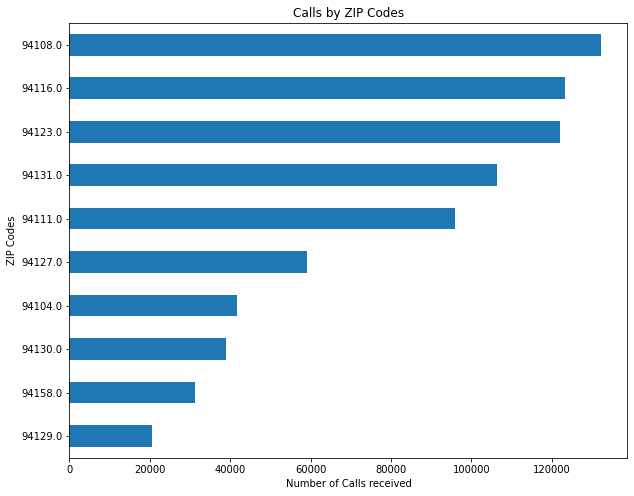

In [21]:
plt.figure(figsize=(10,8))
fig = df['Zipcode of Incident'].value_counts().sort_values(ascending=True).iloc[0:10].plot(kind='barh')
fig.set_title('Calls by ZIP Codes')
fig.set_ylabel('ZIP Codes')
fig.set_xlabel('Number of Calls received')

### Observation:

We are seeing more calls from 94108, 94116, 94123 zip codes

### Top 10 Stations having high call volumns

Text(0.5, 0, 'Number of Calls received')

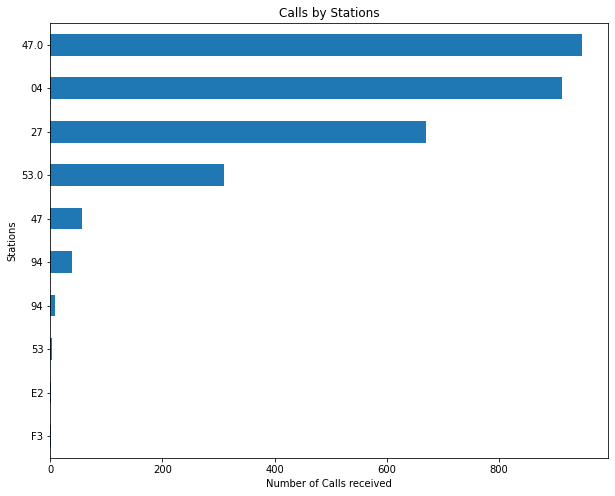

In [22]:
plt.figure(figsize=(10,8))
fig = df['Station Area'].value_counts().sort_values(ascending=True).iloc[0:10].plot(kind='barh')
fig.set_title('Calls by Stations')
fig.set_ylabel('Stations')
fig.set_xlabel('Number of Calls received')

### Observation:

We are seeing more calls from 47, 04, 27 stations